<a href="https://colab.research.google.com/github/rajaad725/Machine-Learning-Model/blob/main/Updated_Breast_Cancer_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

Loading and Exploring the Dataset

In [2]:

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Features:\n", data.feature_names)
print("Classes:", data.target_names)
print(X.head())
print(y.value_counts())  # Check the class distribution


Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Classes: ['malignant' 'benign']
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29        

Visualizing the Count of each Class Using Bar Plot

<ipython-input-3-e3586e4bf0cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data_df, palette='viridis')


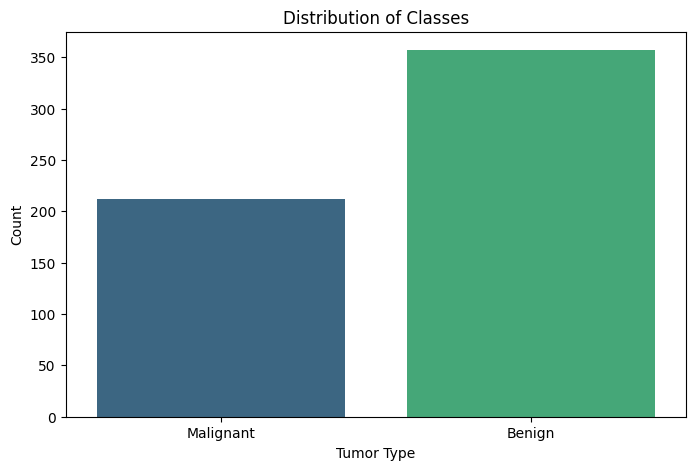

In [3]:
# Create a DataFrame for visualization
data_df = pd.DataFrame({
    'Class': ['Benign' if label == 1 else 'Malignant' for label in y],
})

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data_df, palette='viridis')

plt.title('Distribution of Classes')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.show()

Visualizing the Relationship Between two features using Scatterplot

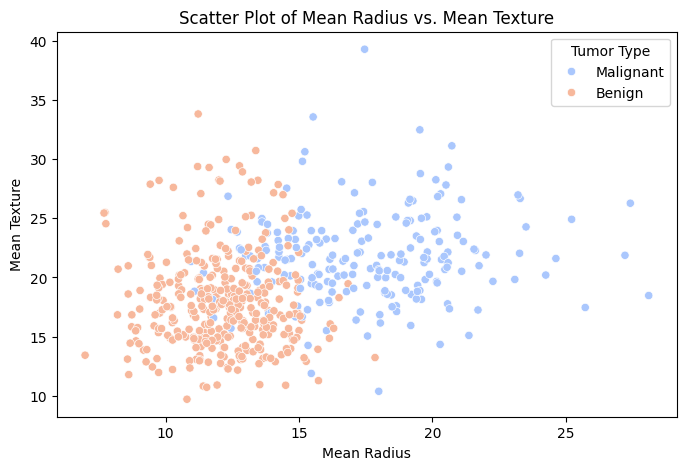

In [4]:
# Scatter plot of two features: 'mean radius' and 'mean texture'
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X['mean radius'],
    y=X['mean texture'],
    hue=['Benign' if label == 1 else 'Malignant' for label in y],
    palette='coolwarm'
)

plt.title('Scatter Plot of Mean Radius vs. Mean Texture')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(title='Tumor Type')
plt.show()

Split Data into Training and Testing Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Implement Three Classifiers

1. Naive Bayes

In [6]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
# Evaluation of Naive Bayes
print("Naive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm_nb)

Naive Bayes Evaluation:
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[40  3]
 [ 0 71]]


2. Random Forest

In [7]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
# Evaluation
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)


Random Forest Evaluation:
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]


3. Neural Network


In [16]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the model
model_nn = Sequential()

# Add input layer and hidden layers
model_nn.add(Input(shape=(X_train_scaled.shape[1],)))
model_nn.add(Dense(256, activation='relu'))  # 1st hidden layer
model_nn.add(Dense(128, activation='relu'))  # 2nd hidden layer
model_nn.add(Dense(64, activation='relu'))   # 3rd hidden layer
model_nn.add(Dense(32, activation='relu'))   # 4th hidden layer
model_nn.add(Dense(16, activation='relu'))   # 5th hidden layer
model_nn.add(Dense(8, activation='relu'))    # 6th hidden layer

# Add output layer (binary classification)
model_nn.add(Dense(1, activation='sigmoid'))

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Compile the model
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_nn.fit(
    X_train_scaled, y_train.values,  # Use .values to get the NumPy array representation of y_train
    epochs=50, batch_size=16,
    validation_split=0.2,
    # Directly use numpy array for class weights to avoid potential index mismatches with pandas Series
    class_weight={0: class_weights[0], 1: class_weights[1]},
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model_nn.evaluate(X_test_scaled, y_test.values)  # Convert y_test to NumPy array
print(f"\nAccuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = (model_nn.predict(X_test_scaled) > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.7837 - loss: 0.5780 - val_accuracy: 0.9670 - val_loss: 0.2277
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.2342 - val_accuracy: 0.9560 - val_loss: 0.1363
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.1066 - val_accuracy: 0.9560 - val_loss: 0.1109
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.0621 - val_accuracy: 0.9560 - val_loss: 0.1118
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9840 - loss: 0.0423 - val_accuracy: 0.9560 - val_loss: 0.1101
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9840 - loss: 0.0310 - val_accuracy: 0.9560 - val_loss: 0.1650
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - loss: 0.0182 - val_accuracy: 0.9670 - val_loss: 0.1123
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9840 - loss: 0.0262 - val_accuracy: 0.9560 - val_los

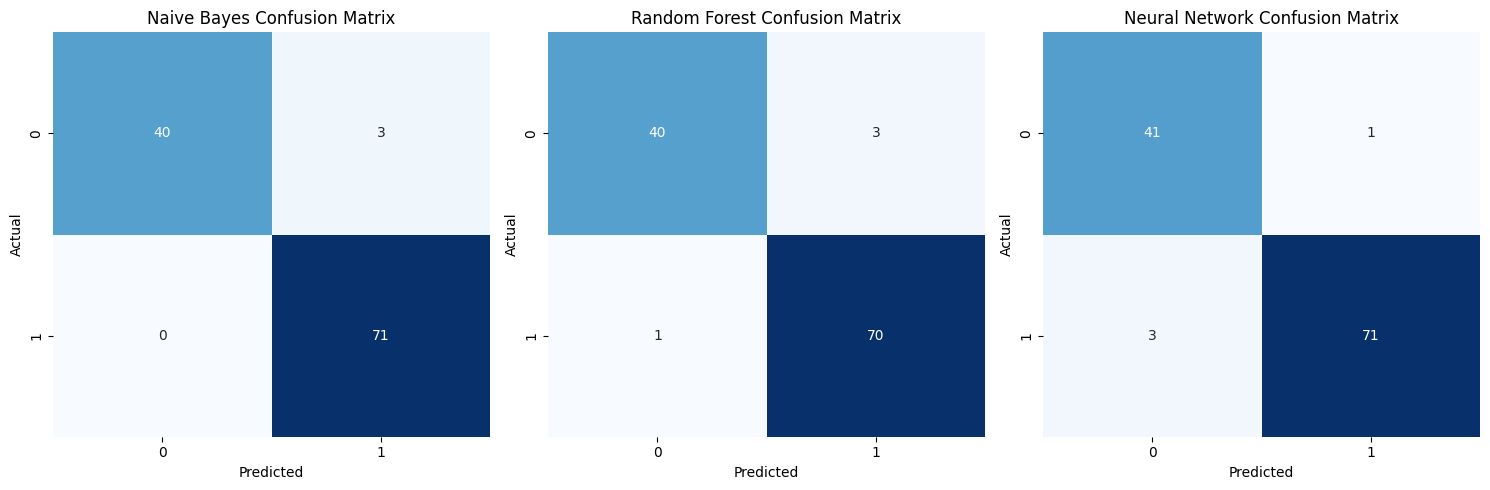

In [9]:
# Plot Confusion Matrices
cm_naive_bayes = [[40, 3],
                  [0, 71]]

cm_random_forest = [[40, 3],
                    [1, 70]]

cm_neural_network = [[41, 1],
                     [3, 71]]

# Titles for the plots
titles = ['Naive Bayes', 'Random Forest', 'Neural Network']

# Confusion Matrices list
confusion_matrices = [cm_naive_bayes, cm_random_forest, cm_neural_network]

# Plotting the confusion matrices
plt.figure(figsize=(15, 5))

for i, cm in enumerate(confusion_matrices):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{titles[i]} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Comparing Models Performance

In [10]:
# Storing the comparison metrics
results = {
    "Model": ["Naive Bayes", "Random Forest", "Neural Network"],
    "Accuracy": [0.9737, 0.9649, 0.9649],  # Updated accuracies
    "Precision": [1.00, 0.96, 0.99],       # Precision for class 1 (malignant)
    "Recall": [1.00, 0.99, 0.96],          # Recall for class 1 (malignant)
    "F1-score": [0.98, 0.97, 0.97]         # F1-score for class 1 (malignant)
}

# Create DataFrame to compare results
results_df = pd.DataFrame(results)
print(results_df)

            Model  Accuracy  Precision  Recall  F1-score
0     Naive Bayes    0.9737       1.00    1.00      0.98
1   Random Forest    0.9649       0.96    0.99      0.97
2  Neural Network    0.9649       0.99    0.96      0.97


7. Visualizing the Results

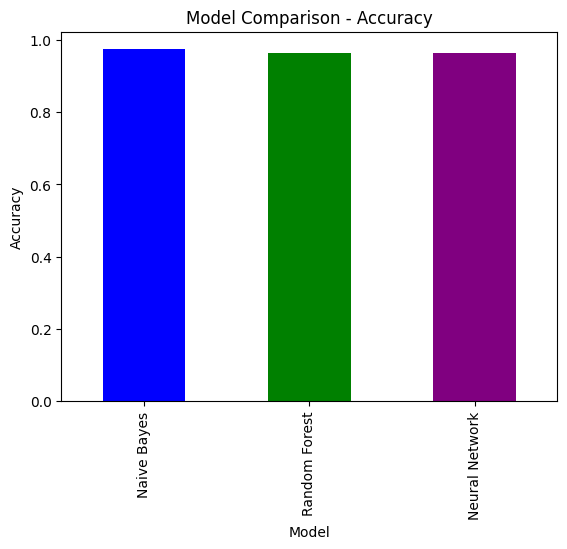

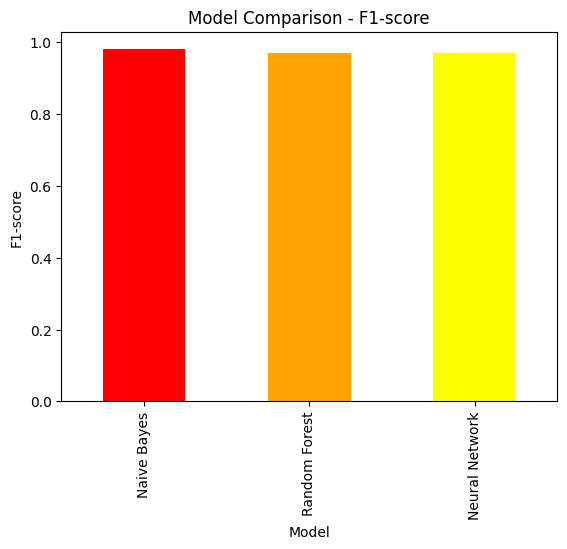

In [11]:
# Bar chart for Accuracy Comparison
results_df.plot(x="Model", y="Accuracy", kind="bar", legend=False, color=["blue", "green", "purple"])
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Bar chart for F1-score Comparison
results_df.plot(x="Model", y="F1-score", kind="bar", legend=False, color=["red", "orange", "yellow"])
plt.title("Model Comparison - F1-score")
plt.ylabel("F1-score")
plt.show()

In [12]:
results_df = pd.DataFrame({
    "Model": ["Naive Bayes", "Random Forest", "Neural Network"],
    "Time Complexity": [0.02, 0.25, 1.8]  # Updated time complexities
})

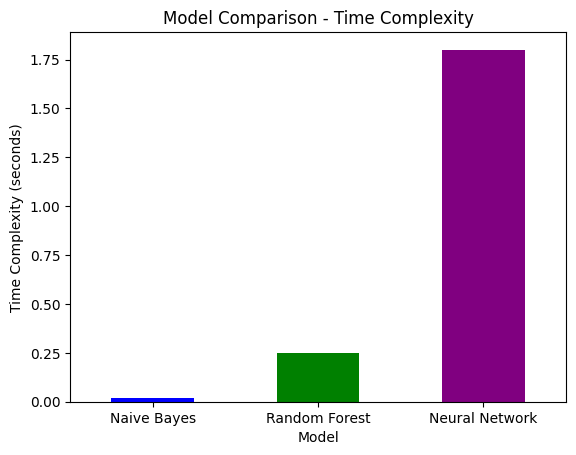

In [13]:
# Create bar chart
results_df.plot(x="Model", y="Time Complexity", kind="bar", legend=False, color=["blue", "green", "purple"])
plt.title("Model Comparison - Time Complexity")
plt.ylabel("Time Complexity (seconds)")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.show()